In [ ]:
#https://github.com/PPPW/deep-learning-random-explore/blob/master/CNN_archs/cnn_archs.ipynb

In [1]:
from fastai.vision.all import *

In [2]:
torch.cuda.is_available()

False

In [3]:
source = f'/home/oem/Images/dataset_fridge'
#source = r'C:\Users\Remi\Pictures\DATASET-20210121T074943Z-001\DATASET'

df_marks = pd.DataFrame({'fname':['p0'], 'label':['oeuf'], 'is_valid':[True]})

#os.chdir(source)
for root, dirs, files in os.walk(source, topdown = False):
   for name in files:
      my_path = os.path.join(source, root, name)
      categorie = root.split("/")[7]
      #print(my_path)
      is_valid = False
      if r'\003\frigo' in root:
        is_valid = True
      new_row = {'fname':my_path[9+14:], 'label':categorie, 'is_valid':is_valid}
      df_marks = df_marks.append(new_row, ignore_index=True)
df_marks = df_marks[2:]

print(df_marks)

                                                                       fname  \
2    t_fridge/DATASET/autres/crème fraiche/002/table/IMG_20210117_100613.jpg   
3    t_fridge/DATASET/autres/crème fraiche/002/frigo/IMG_20210117_100619.jpg   
4    t_fridge/DATASET/autres/crème fraiche/002/frigo/IMG_20210117_100621.jpg   
5    t_fridge/DATASET/autres/crème fraiche/003/table/IMG_20210117_100705.jpg   
6    t_fridge/DATASET/autres/crème fraiche/003/table/IMG_20210117_100706.jpg   
..                                                                       ...   
863              t_fridge/DATASET/fruits/pomme/000/table/20210112_202124.jpg   
864              t_fridge/DATASET/fruits/pomme/000/table/20210112_202111.jpg   
865                   t_fridge/DATASET/fruits/citron/IMG_20201230_145224.jpg   
866                   t_fridge/DATASET/fruits/citron/IMG_20201230_145225.jpg   
867                   t_fridge/DATASET/fruits/citron/IMG_20201230_145228.jpg   

             label  is_valid  
2    crè

len("Remi\Pictures")

In [5]:
top_10_list = [str(x) for x in df_marks.groupby('label').agg([ 'count']).reset_index().sort_values([('fname', 'count')], ascending=False)['label'][0:10]]
df_marks.groupby('label').agg([ 'count']).reset_index().sort_values([('fname', 'count')], ascending=False)

,label,fname,is_valid
,,count,count
6,beurre,114,114
33,oeufs,106,106
16,crème fraiche,49,49
25,fromage rapé,44,44
30,lait,36,36
32,mayonnaise,31,31
50,yaourt,31,31
38,pateFeuilletee,28,28
48,thon,26,26


In [ ]:
df_marks = pd.DataFrame({'fname':['p0'], 'label':['oeuf'], 'is_valid':[True]})

#os.chdir(source)
for root, dirs, files in os.walk(source, topdown = False):
   for name in files:
      my_path = os.path.join(source, root, name)
      categorie = root.split("/")[7]
      #print(my_path)
      is_valid = False
      if r'/003/frigo' in root:
        is_valid = True
      if r'/002/frigo' in root:
        is_valid = True
      if categorie in top_10_list:
          new_row = {'fname':my_path[9+14+17:], 'label':categorie.replace(" ","-"), 'is_valid':is_valid}
          df_marks = df_marks.append(new_row, ignore_index=True)
df_marks = df_marks[2:]

print(df_marks)

In [ ]:
#dls = ImageDataLoaders.from_df(df, path, folder='train', valid_col='is_valid', label_delim=' ',item_tfms=Resize(128), bs=4 ,batch_tfms=aug_transforms(size=128))
dls = ImageDataLoaders.from_df(df_marks[2:],path = r'/home/oem/Images/dataset_fridge/DATASET', valid_col='is_valid', label_delim=' ',
                               item_tfms=Resize(128*4), bs=4, num_workers=4, batch_tfms=aug_transforms(size=128*3))#,do_flip=False))

In [ ]:
dls.show_batch(unique=True,figsize=(14,14))

In [ ]:
len(dls.train)

In [ ]:
len(dls.valid)

In [ ]:
from torchvision import models

In [ ]:
#learn = cnn_learner(dls, mansnet_fn, cut=-1, metrics=partial(accuracy_multi, thresh=0.5))
#learn = cnn_learner(dls, models.mobilenet_v2, cut=-1, pretrained=True,metrics=partial(accuracy_multi, thresh=0.5),cbs=[SaveModelCallback()])
learn = cnn_learner(dls,resnet18, pretrained=True,metrics=partial(accuracy_multi, thresh=0.5))#,cbs=[SaveModelCallback()])

In [ ]:
#learn.lr_find()
learn.path

In [ ]:
if False:
    import cProfile
    Pr=cProfile.Profile()
    Pr.enable()

    learn.lr_find()

    Pr.disable()
    Pr.print_stats('time')

In [ ]:
learn.fit_one_cycle(5, lr_max=slice(0.05))

In [ ]:
#learn.model

In [ ]:
learn.lr_find()

In [ ]:
learn.loss_func

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(15, lr_max=slice(1e-6))

In [ ]:
learn.show_results()

In [ ]:
#learn.load(r'C:\Users\Remi\Pictures\models\model')
learn.show_results()

In [ ]:
learn.predict(r'C:\Users\Remi\Pictures\DATASET-20210121T074943Z-001\DATASET\autres\fromage rapé\002\frigo\IMG_20210109_141927.jpg')

In [ ]:
learn.predict('/home/oem/Images/dataset_fridge/Dataset/Le beurre et l_argent du beurre /internet/beurre-bordier-demi-sel.jpg')

In [ ]:
learn.dls.vocab

In [7]:
source = f'/home/oem/Images/dataset_fridge'
files = get_image_files(source)
files = [f for f in files]

In [8]:
set_list = []
for f in files:
    for top in top_10_list:
        print(f,top)
        if top in str(f):
            set_list.append(f)

/home/oem/Images/dataset_fridge/DATASET/autres/crème fraiche/002/table/IMG_20210117_100615.jpg beurre
/home/oem/Images/dataset_fridge/DATASET/autres/crème fraiche/002/table/IMG_20210117_100615.jpg oeufs
/home/oem/Images/dataset_fridge/DATASET/autres/crème fraiche/002/table/IMG_20210117_100615.jpg crème fraiche
/home/oem/Images/dataset_fridge/DATASET/autres/crème fraiche/002/table/IMG_20210117_100615.jpg fromage rapé 
/home/oem/Images/dataset_fridge/DATASET/autres/crème fraiche/002/table/IMG_20210117_100615.jpg lait
/home/oem/Images/dataset_fridge/DATASET/autres/crème fraiche/002/table/IMG_20210117_100615.jpg mayonnaise
/home/oem/Images/dataset_fridge/DATASET/autres/crème fraiche/002/table/IMG_20210117_100615.jpg yaourt
/home/oem/Images/dataset_fridge/DATASET/autres/crème fraiche/002/table/IMG_20210117_100615.jpg pateFeuilletee
/home/oem/Images/dataset_fridge/DATASET/autres/crème fraiche/002/table/IMG_20210117_100615.jpg thon
/home/oem/Images/dataset_fridge/DATASET/autres/crème fraiche/

/home/oem/Images/dataset_fridge/DATASET/autres/beurre/telephone/007/frigo/IMG-20210114-WA0054.jpg chocolat noir
/home/oem/Images/dataset_fridge/DATASET/autres/beurre/telephone/007/frigo/IMG-20210114-WA0056.jpg beurre
/home/oem/Images/dataset_fridge/DATASET/autres/beurre/telephone/007/frigo/IMG-20210114-WA0056.jpg oeufs
/home/oem/Images/dataset_fridge/DATASET/autres/beurre/telephone/007/frigo/IMG-20210114-WA0056.jpg crème fraiche
/home/oem/Images/dataset_fridge/DATASET/autres/beurre/telephone/007/frigo/IMG-20210114-WA0056.jpg fromage rapé 
/home/oem/Images/dataset_fridge/DATASET/autres/beurre/telephone/007/frigo/IMG-20210114-WA0056.jpg lait
/home/oem/Images/dataset_fridge/DATASET/autres/beurre/telephone/007/frigo/IMG-20210114-WA0056.jpg mayonnaise
/home/oem/Images/dataset_fridge/DATASET/autres/beurre/telephone/007/frigo/IMG-20210114-WA0056.jpg yaourt
/home/oem/Images/dataset_fridge/DATASET/autres/beurre/telephone/007/frigo/IMG-20210114-WA0056.jpg pateFeuilletee
/home/oem/Images/dataset_

/home/oem/Images/dataset_fridge/DATASET/autres/yaourt/telephone/002/table/IMG-20210114-WA0060.jpg chocolat noir
/home/oem/Images/dataset_fridge/DATASET/autres/yaourt/telephone/002/table/IMG-20210114-WA0057.jpg beurre
/home/oem/Images/dataset_fridge/DATASET/autres/yaourt/telephone/002/table/IMG-20210114-WA0057.jpg oeufs
/home/oem/Images/dataset_fridge/DATASET/autres/yaourt/telephone/002/table/IMG-20210114-WA0057.jpg crème fraiche
/home/oem/Images/dataset_fridge/DATASET/autres/yaourt/telephone/002/table/IMG-20210114-WA0057.jpg fromage rapé 
/home/oem/Images/dataset_fridge/DATASET/autres/yaourt/telephone/002/table/IMG-20210114-WA0057.jpg lait
/home/oem/Images/dataset_fridge/DATASET/autres/yaourt/telephone/002/table/IMG-20210114-WA0057.jpg mayonnaise
/home/oem/Images/dataset_fridge/DATASET/autres/yaourt/telephone/002/table/IMG-20210114-WA0057.jpg yaourt
/home/oem/Images/dataset_fridge/DATASET/autres/yaourt/telephone/002/table/IMG-20210114-WA0057.jpg pateFeuilletee
/home/oem/Images/dataset_

/home/oem/Images/dataset_fridge/DATASET/autres/pateFeuilletee/000/frigo/IMG_20210114_223345.jpg crème fraiche
/home/oem/Images/dataset_fridge/DATASET/autres/pateFeuilletee/000/frigo/IMG_20210114_223345.jpg fromage rapé 
/home/oem/Images/dataset_fridge/DATASET/autres/pateFeuilletee/000/frigo/IMG_20210114_223345.jpg lait
/home/oem/Images/dataset_fridge/DATASET/autres/pateFeuilletee/000/frigo/IMG_20210114_223345.jpg mayonnaise
/home/oem/Images/dataset_fridge/DATASET/autres/pateFeuilletee/000/frigo/IMG_20210114_223345.jpg yaourt
/home/oem/Images/dataset_fridge/DATASET/autres/pateFeuilletee/000/frigo/IMG_20210114_223345.jpg pateFeuilletee
/home/oem/Images/dataset_fridge/DATASET/autres/pateFeuilletee/000/frigo/IMG_20210114_223345.jpg thon
/home/oem/Images/dataset_fridge/DATASET/autres/pateFeuilletee/000/frigo/IMG_20210114_223345.jpg chocolat noir
/home/oem/Images/dataset_fridge/DATASET/autres/pateFeuilletee/000/frigo/IMG_20210109_141303.jpg beurre
/home/oem/Images/dataset_fridge/DATASET/autr

/home/oem/Images/dataset_fridge/DATASET/autres/pain de mie/000/table/20210112_202829.jpg beurre
/home/oem/Images/dataset_fridge/DATASET/autres/pain de mie/000/table/20210112_202829.jpg oeufs
/home/oem/Images/dataset_fridge/DATASET/autres/pain de mie/000/table/20210112_202829.jpg crème fraiche
/home/oem/Images/dataset_fridge/DATASET/autres/pain de mie/000/table/20210112_202829.jpg fromage rapé 
/home/oem/Images/dataset_fridge/DATASET/autres/pain de mie/000/table/20210112_202829.jpg lait
/home/oem/Images/dataset_fridge/DATASET/autres/pain de mie/000/table/20210112_202829.jpg mayonnaise
/home/oem/Images/dataset_fridge/DATASET/autres/pain de mie/000/table/20210112_202829.jpg yaourt
/home/oem/Images/dataset_fridge/DATASET/autres/pain de mie/000/table/20210112_202829.jpg pateFeuilletee
/home/oem/Images/dataset_fridge/DATASET/autres/pain de mie/000/table/20210112_202829.jpg thon
/home/oem/Images/dataset_fridge/DATASET/autres/pain de mie/000/table/20210112_202829.jpg chocolat noir
/home/oem/Im

/home/oem/Images/dataset_fridge/DATASET/viandes/Saumon/000/table/IMG_20210109_141625.jpg oeufs
/home/oem/Images/dataset_fridge/DATASET/viandes/Saumon/000/table/IMG_20210109_141625.jpg crème fraiche
/home/oem/Images/dataset_fridge/DATASET/viandes/Saumon/000/table/IMG_20210109_141625.jpg fromage rapé 
/home/oem/Images/dataset_fridge/DATASET/viandes/Saumon/000/table/IMG_20210109_141625.jpg lait
/home/oem/Images/dataset_fridge/DATASET/viandes/Saumon/000/table/IMG_20210109_141625.jpg mayonnaise
/home/oem/Images/dataset_fridge/DATASET/viandes/Saumon/000/table/IMG_20210109_141625.jpg yaourt
/home/oem/Images/dataset_fridge/DATASET/viandes/Saumon/000/table/IMG_20210109_141625.jpg pateFeuilletee
/home/oem/Images/dataset_fridge/DATASET/viandes/Saumon/000/table/IMG_20210109_141625.jpg thon
/home/oem/Images/dataset_fridge/DATASET/viandes/Saumon/000/table/IMG_20210109_141625.jpg chocolat noir
/home/oem/Images/dataset_fridge/DATASET/viandes/Saumon/000/table/IMG_20210109_141651.jpg beurre
/home/oem/Im

/home/oem/Images/dataset_fridge/DATASET/viandes/saucisse/telephone/001/table/IMG-20210112-WA0003.jpg pateFeuilletee
/home/oem/Images/dataset_fridge/DATASET/viandes/saucisse/telephone/001/table/IMG-20210112-WA0003.jpg thon
/home/oem/Images/dataset_fridge/DATASET/viandes/saucisse/telephone/001/table/IMG-20210112-WA0003.jpg chocolat noir
/home/oem/Images/dataset_fridge/DATASET/viandes/saucisse/telephone/001/table/IMG-20210112-WA0023.jpg beurre
/home/oem/Images/dataset_fridge/DATASET/viandes/saucisse/telephone/001/table/IMG-20210112-WA0023.jpg oeufs
/home/oem/Images/dataset_fridge/DATASET/viandes/saucisse/telephone/001/table/IMG-20210112-WA0023.jpg crème fraiche
/home/oem/Images/dataset_fridge/DATASET/viandes/saucisse/telephone/001/table/IMG-20210112-WA0023.jpg fromage rapé 
/home/oem/Images/dataset_fridge/DATASET/viandes/saucisse/telephone/001/table/IMG-20210112-WA0023.jpg lait
/home/oem/Images/dataset_fridge/DATASET/viandes/saucisse/telephone/001/table/IMG-20210112-WA0023.jpg mayonnaise


/home/oem/Images/dataset_fridge/DATASET/fruits/pomme/000/table/20210112_202111.jpg crème fraiche
/home/oem/Images/dataset_fridge/DATASET/fruits/pomme/000/table/20210112_202111.jpg fromage rapé 
/home/oem/Images/dataset_fridge/DATASET/fruits/pomme/000/table/20210112_202111.jpg lait
/home/oem/Images/dataset_fridge/DATASET/fruits/pomme/000/table/20210112_202111.jpg mayonnaise
/home/oem/Images/dataset_fridge/DATASET/fruits/pomme/000/table/20210112_202111.jpg yaourt
/home/oem/Images/dataset_fridge/DATASET/fruits/pomme/000/table/20210112_202111.jpg pateFeuilletee
/home/oem/Images/dataset_fridge/DATASET/fruits/pomme/000/table/20210112_202111.jpg thon
/home/oem/Images/dataset_fridge/DATASET/fruits/pomme/000/table/20210112_202111.jpg chocolat noir
/home/oem/Images/dataset_fridge/DATASET/fruits/citron/IMG_20201230_145224.jpg beurre
/home/oem/Images/dataset_fridge/DATASET/fruits/citron/IMG_20201230_145224.jpg oeufs
/home/oem/Images/dataset_fridge/DATASET/fruits/citron/IMG_20201230_145224.jpg crèm

In [9]:
def label_func(f): 
    #print(f)
    categorie = str(f).split("/")[7].replace(" ","_")
    return categorie

In [10]:
#def label_func(x): return x.parent.parent.parent.name

In [11]:
label_func(set_list[0])

'crème_fraiche'

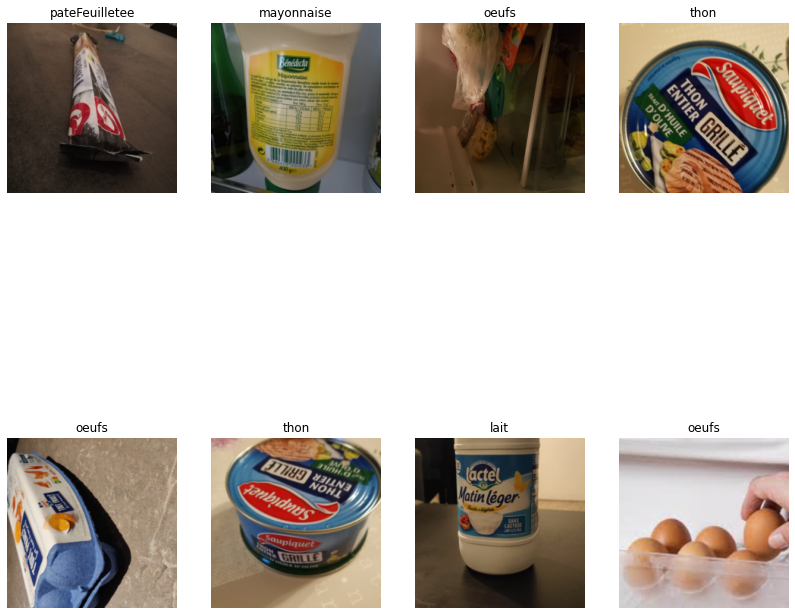

In [12]:
dls = ImageDataLoaders.from_path_func(source, set_list, label_func, bs= 8, item_tfms=Resize(224),workers=1)
#dls = ImageDataLoaders.from_df(df_marks[2:],path = r'/home/oem/Images/dataset_fridge/DATASET', valid_col='is_valid', label_delim=' ',
#                               item_tfms=Resize(128*2), bs=4, num_workers=4, batch_tfms=aug_transforms(size=int(128*1.5)))

dls.show_batch(unique=False,figsize=(14,14))

In [13]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)

In [14]:
len(dls.train)

49

In [15]:
len(dls.valid)

13

In [18]:
#learn.model

In [17]:
learn.lr_find()

KeyboardInterrupt: 

In [19]:
#import cProfile
#Pr=cProfile.Profile()
#Pr.enable()

learn.fine_tune(10,    base_lr=0.0004,)

#Pr.disable()
#Pr.print_stats('time')

epoch,train_loss,valid_loss,error_rate,time
0,3.543710,2.168143,0.755102,01:01


KeyboardInterrupt: 

In [26]:
learn.loss_func

FlattenedLoss of CrossEntropyLoss()

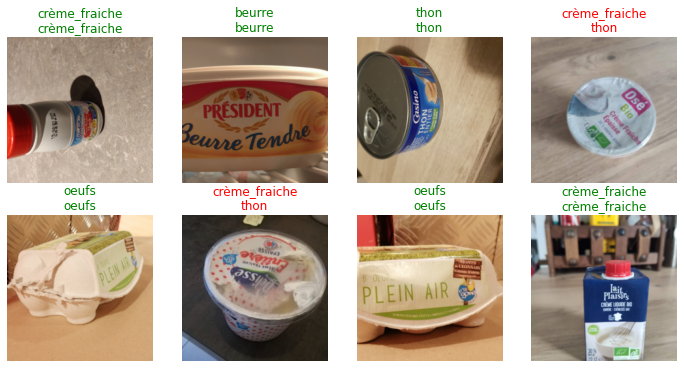

In [30]:
learn.show_results()

In [31]:
inter = ClassificationInterpretation.from_learner(learn)

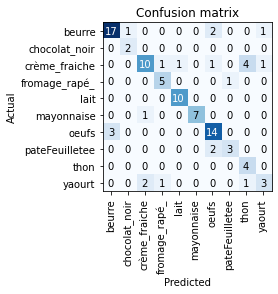

In [24]:
inter.plot_confusion_matrix()

In [34]:
23/(23+17+2+10+5+10+7+14+3+4+3)

0.23469387755102042

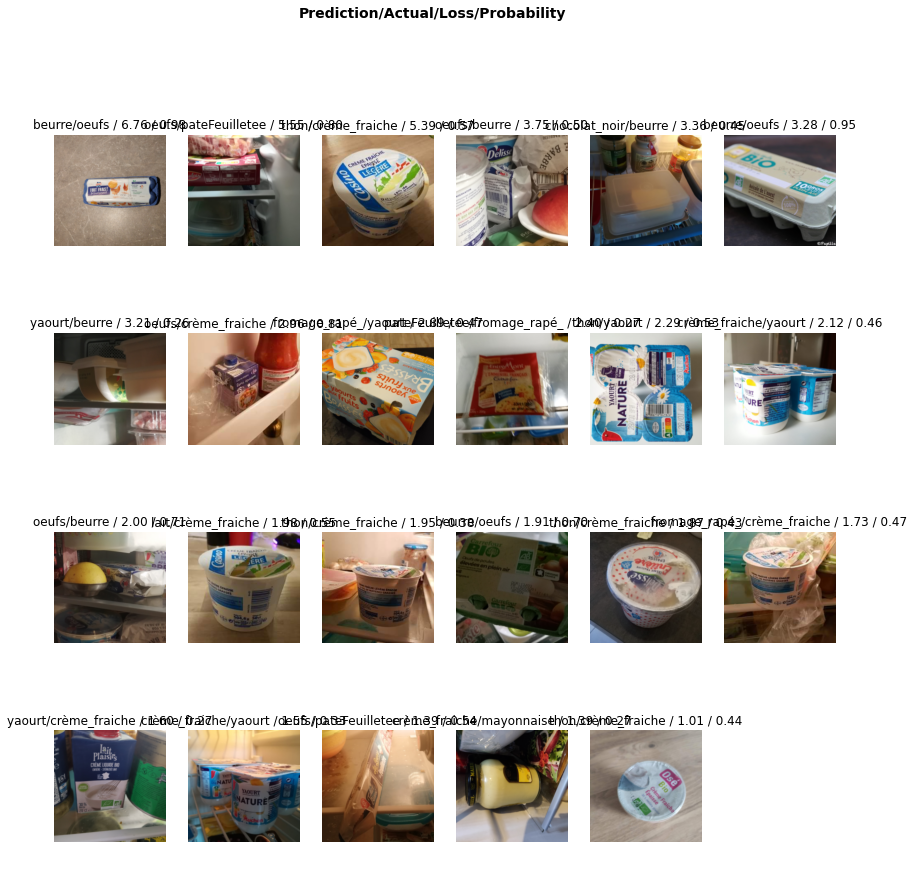

In [35]:
inter.plot_top_losses(23,figsize=(14,14))